In [606]:
import pandas as pd
import pymysql
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy import stats
from tensorly.decomposition import parafac
#
# Remove the limit on column width
pd.set_option('display.max_colwidth', None)

In [607]:
import custom_functions_katerina 

In [555]:
df = pd.read_csv('values.csv')
df_c = pd.read_csv('countries.csv')
df_i = pd.read_csv('indicators.csv')

General Check of the dataframe

In [556]:
#joining to insert the region in the values table
df_ = pd.merge(df,df_c, on='country_id',how='left' )

In [557]:
#join to insert information about the indicators
df_c_i = pd.merge(df_, df_i, on='indicator_id', how = 'left')

In [558]:
df_.isna().sum()

country_id        0
indicator_id      0
year              0
value             0
country_name    288
region          288
dtype: int64

In [559]:
df_c_i.isna().sum()

country_id          0
indicator_id        0
year                0
value               0
country_name      288
region            288
indicator_name      0
unit                0
dtype: int64

It has some NANs as it has some countries that are not present in the countries table.
#Hence we delete those values

In [560]:
#Investigating which countries are these
df_countries_missing = set(df['country_id']) - set(df_c['country_id']) #not in df_C
df_countries_missing
df_countries_missing_fromc = set(df_c['country_id']) - set(df['country_id']) 
df_countries_missing_fromc
print(df_countries_missing , df_countries_missing_fromc) # find the difference in countries to see if to delete


{'AFE', 'AFW', 'ABW', 'AFG'} set()


These countries are small appart from AFW (Afganistan) which is also included in other regions
So we have made a decision to drop them

In [561]:
df_.dropna(inplace=True)
df_c_i.dropna(inplace=True)

In [562]:
df_c_i.reset_index(drop=True, inplace=True)
df_.reset_index(drop=True, inplace=True)

Investigate which countries belong within the regions we have defined

In [563]:
df_regions_countries = df_.groupby('region')['country_id'].unique().reset_index()
df_regions_countries

,region,country_id
0,Africa,"[AGO, BDI, BEN, BFA, BWA, CAF, CIV, CMR, COD, COG, COM, CPV, ERI, ETH, GAB, GHA, GIN, GMB, GNB, GNQ, KEN, LBR, LSO, MDG, MLI, MOZ, MRT, MUS, MWI, NAM, NER, NGA, RWA, SDN, SEN, SLE, SOM, SSD, STP, SWZ, SYC, TCD, TGO, TZA, UGA, ZAF, ZMB, ZWE]"
1,East Asia and Pacific,"[BRN, CHN, GUM, HKG, IDN, JPN, KHM, KOR, LAO, MAC, MMR, MNG, MNP, MYS, PHL, PNG, PRK, SGP, THA, TLS, VNM]"
2,Europe and Central Asia,"[ALB, AND, ARM, AUT, AZE, BEL, BGR, BIH, BLR, CHE, CHI, CYP, CZE, DEU, DNK, ESP, EST, FIN, FRA, FRO, GBR, GEO, GIB, GRC, GRL, HRV, HUN, IMN, IRL, ISL, ITA, KAZ, KGZ, LIE, LTU, LUX, LVA, MCO, MDA, MKD, MLT, MNE, NLD, NOR, POL, PRT, ROU, RUS, SMR, SRB, SVK, SVN, SWE, TJK, TKM, TUR, UKR, UZB, XKX]"
3,Latin America and the Caribbean,"[ARG, ATG, BHS, BLZ, BMU, BOL, BRA, BRB, CHL, COL, CRI, CUB, CUW, CYM, DMA, DOM, ECU, GRD, GTM, GUY, HND, HTI, JAM, KNA, LCA, MAF, MEX, NIC, PAN, PER, PRY, SLV, SUR, SXM, TCA, TTO, URY, VCT, VEN, VGB, VIR]"
4,"Middle East, North Africa, Afghanistan & Pakistan","[ARE, BHR, DJI, DZA, EGY, IRN, IRQ, ISR, JOR, KWT, LBN, LBY, MAR, OMN, PAK, PSE, QAT, SAU, SYR, TUN, YEM]"
5,North America,"[CAN, PRI, USA]"
6,OCEANIA,"[ASM, AUS, FJI, FSM, KIR, MHL, NCL, NRU, NZL, PLW, PYF, SLB, TON, TUV, VUT, WSM]"
7,REGION,"[ARB, CEB, CSS, EAS, ECS, LCN, MEA, NAC, OSS, PSS, SAS, SSF, SST, WLD]"
8,SOCIOECONOMIC,"[EAP, EAR, ECA, EMU, EUU, FCS, HIC, HPC, IBD, IBT, IDA, IDB, IDX, LAC, LDC, LIC, LMC, LMY, LTE, MIC, MNA, OED, PRE, PST, SSA, TEA, TEC, TLA, TMN, TSA, TSS, UMC]"
9,South Asia,"[BGD, BTN, IND, LKA, MDV, NPL]"


In [564]:
df_regions_countries

,region,country_id
0,Africa,"[AGO, BDI, BEN, BFA, BWA, CAF, CIV, CMR, COD, COG, COM, CPV, ERI, ETH, GAB, GHA, GIN, GMB, GNB, GNQ, KEN, LBR, LSO, MDG, MLI, MOZ, MRT, MUS, MWI, NAM, NER, NGA, RWA, SDN, SEN, SLE, SOM, SSD, STP, SWZ, SYC, TCD, TGO, TZA, UGA, ZAF, ZMB, ZWE]"
1,East Asia and Pacific,"[BRN, CHN, GUM, HKG, IDN, JPN, KHM, KOR, LAO, MAC, MMR, MNG, MNP, MYS, PHL, PNG, PRK, SGP, THA, TLS, VNM]"
2,Europe and Central Asia,"[ALB, AND, ARM, AUT, AZE, BEL, BGR, BIH, BLR, CHE, CHI, CYP, CZE, DEU, DNK, ESP, EST, FIN, FRA, FRO, GBR, GEO, GIB, GRC, GRL, HRV, HUN, IMN, IRL, ISL, ITA, KAZ, KGZ, LIE, LTU, LUX, LVA, MCO, MDA, MKD, MLT, MNE, NLD, NOR, POL, PRT, ROU, RUS, SMR, SRB, SVK, SVN, SWE, TJK, TKM, TUR, UKR, UZB, XKX]"
3,Latin America and the Caribbean,"[ARG, ATG, BHS, BLZ, BMU, BOL, BRA, BRB, CHL, COL, CRI, CUB, CUW, CYM, DMA, DOM, ECU, GRD, GTM, GUY, HND, HTI, JAM, KNA, LCA, MAF, MEX, NIC, PAN, PER, PRY, SLV, SUR, SXM, TCA, TTO, URY, VCT, VEN, VGB, VIR]"
4,"Middle East, North Africa, Afghanistan & Pakistan","[ARE, BHR, DJI, DZA, EGY, IRN, IRQ, ISR, JOR, KWT, LBN, LBY, MAR, OMN, PAK, PSE, QAT, SAU, SYR, TUN, YEM]"
5,North America,"[CAN, PRI, USA]"
6,OCEANIA,"[ASM, AUS, FJI, FSM, KIR, MHL, NCL, NRU, NZL, PLW, PYF, SLB, TON, TUV, VUT, WSM]"
7,REGION,"[ARB, CEB, CSS, EAS, ECS, LCN, MEA, NAC, OSS, PSS, SAS, SSF, SST, WLD]"
8,SOCIOECONOMIC,"[EAP, EAR, ECA, EMU, EUU, FCS, HIC, HPC, IBD, IBT, IDA, IDB, IDX, LAC, LDC, LIC, LMC, LMY, LTE, MIC, MNA, OED, PRE, PST, SSA, TEA, TEC, TLA, TMN, TSA, TSS, UMC]"
9,South Asia,"[BGD, BTN, IND, LKA, MDV, NPL]"


Find which Years the dataset spans

In [565]:
df_['year'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019])

In [566]:
#Create a datafame with all the information from the 3 matrices, and without SOCIOECONOMIC and REGION
df_all = df_c_i[~df_c_i['region'].isin(['REGION', 'SOCIOECONOMIC'])]
df_all.head()

,country_id,indicator_id,year,value,country_name,region,indicator_name,unit
0,AGO,CHE,2008,3.322903,Angola,Africa,Current health expenditure,% of GDP
1,AGO,CHE,2009,3.842608,Angola,Africa,Current health expenditure,% of GDP
2,AGO,CHE,2010,2.695100,Angola,Africa,Current health expenditure,% of GDP
3,AGO,CHE,2011,2.645608,Angola,Africa,Current health expenditure,% of GDP
4,AGO,CHE,2012,2.395750,Angola,Africa,Current health expenditure,% of GDP


# Outliers

The two rows (REGION and SOCIOECONOMIC) do not contain actual countries. They contain aggregate codes used by the World Bank.

Row 7 (REGION): Contains codes like ARB (Arab World), EAS (East Asia & Pacific aggregate), LCN (Latin America & Caribbean aggregate). These are broad groupings, not individual nations.

Row 8 (SOCIOECONOMIC): Contains codes like HIC (High Income), LDC (Least Developed Countries), UMC (Upper Middle Income). These represent economic brackets  

**We are excluding them**


## Detect outliers for each indicator and for each region over the last 10 year

In [568]:
# --- TASK (i): OUTLIERS (LAST 10 YEARS) ---

# Filter for the last 10 years a(REGION and SOCIOECONOMIC labeled regions but do not contain countries --REMOVE)
# In our case this is not necessary as data was cleaned to only include 2008-2019
df_10years = df_[df_['year'] >= 2010].copy()
#If region is "REGION" or "SOCIOECONOMIC" we remove those rows
df_outliers_ = df_10years[~df_10years['region'].isin(['REGION', 'SOCIOECONOMIC'])]


In [569]:
df_outliers['region'].unique()

array(['Africa', 'Europe and Central Asia',
       'Middle East, North Africa, Afghanistan & Pakistan',
       'Latin America and the Caribbean', 'OCEANIA', 'South Asia',
       'East Asia and Pacific', 'North America'], dtype=object)

In [570]:
df_ouliers = find_outliers(df_outliers)

In [571]:
df_outliers.head()

,country_id,indicator_id,year,value,country_name,region,mean,std,z_score,is_outlier
2,AGO,CHE,2010,2.695100,Angola,Africa,5.274319,2.489517,-1.036032,0
3,AGO,CHE,2011,2.645608,Angola,Africa,5.274319,2.489517,-1.055912,0
4,AGO,CHE,2012,2.395750,Angola,Africa,5.274319,2.489517,-1.156276,0
5,AGO,CHE,2013,2.732827,Angola,Africa,5.274319,2.489517,-1.020878,0
6,AGO,CHE,2014,2.434129,Angola,Africa,5.274319,2.489517,-1.140860,0


In [572]:
#Find the countries with the most outliers within those 10 years selected
df_isoutlier = df_outliers[df_outliers['is_outlier'] == 1]
df_counts_percountry = df_isoutlier.groupby(['country_id','indicator_id','year'])['value'].count()

In [573]:
#we have this matrix which shows which country, region, indicator, value and z-score of the outlier
df_isoutlier.head()

,country_id,indicator_id,year,value,country_name,region,mean,std,z_score,is_outlier
674,AUS,GEM,2010,6.438945e+02,Australia,OCEANIA,6.450921e+01,1.725066e+02,3.358627,1
675,AUS,GEM,2011,6.160435e+02,Australia,OCEANIA,6.450921e+01,1.725066e+02,3.197178,1
676,AUS,GEM,2012,5.943439e+02,Australia,OCEANIA,6.450921e+01,1.725066e+02,3.071388,1
677,AUS,GEM,2013,6.008677e+02,Australia,OCEANIA,6.450921e+01,1.725066e+02,3.109206,1
686,AUS,POP,2010,2.203175e+07,Australia,OCEANIA,1.956852e+06,5.732755e+06,3.501789,1


In [574]:
#Outliers per region  for all indicators and year and their percentage within the total outliers
df_outliers_region['perc%'] = df_outliers_region['count'] * 100 / len(df_isoutlier)
round(df_outliers_region,2)

,region,count,perc%
0,Europe and Central Asia,68,29.18
1,Africa,58,24.89
2,Latin America and the Caribbean,57,24.46
3,"Middle East, North Africa, Afghanistan & Pakistan",29,12.45
4,East Asia and Pacific,23,9.87
5,OCEANIA,17,7.30


In [575]:
#outliers as per country
df_outliers_country = df_isoutlier[['country_id','region']].value_counts().reset_index()
df_outliers_country.sort_values('count', ascending = False)

,country_id,region,count
0,CHN,East Asia and Pacific,20
1,BRA,Latin America and the Caribbean,20
2,HTI,Latin America and the Caribbean,20
3,ZAF,Africa,20
4,NGA,Africa,20
5,PAK,"Middle East, North Africa, Afghanistan & Pakistan",20
6,RUS,Europe and Central Asia,19
7,AUS,OCEANIA,14
8,DEU,Europe and Central Asia,10
9,ISL,Europe and Central Asia,10


Outliers by indicator

In [576]:
df_outliers_indicator = df_isoutlier['indicator_id'].value_counts().reset_index()
df_outliers_indicator.sort_values('count', ascending = False)

,indicator_id,count
0,GEM,67
1,POP,63
2,WU,33
3,WR,21
4,REN,20
5,SU,16
6,CHE,11
7,SR,2


Zscore scatter plot for one indicator

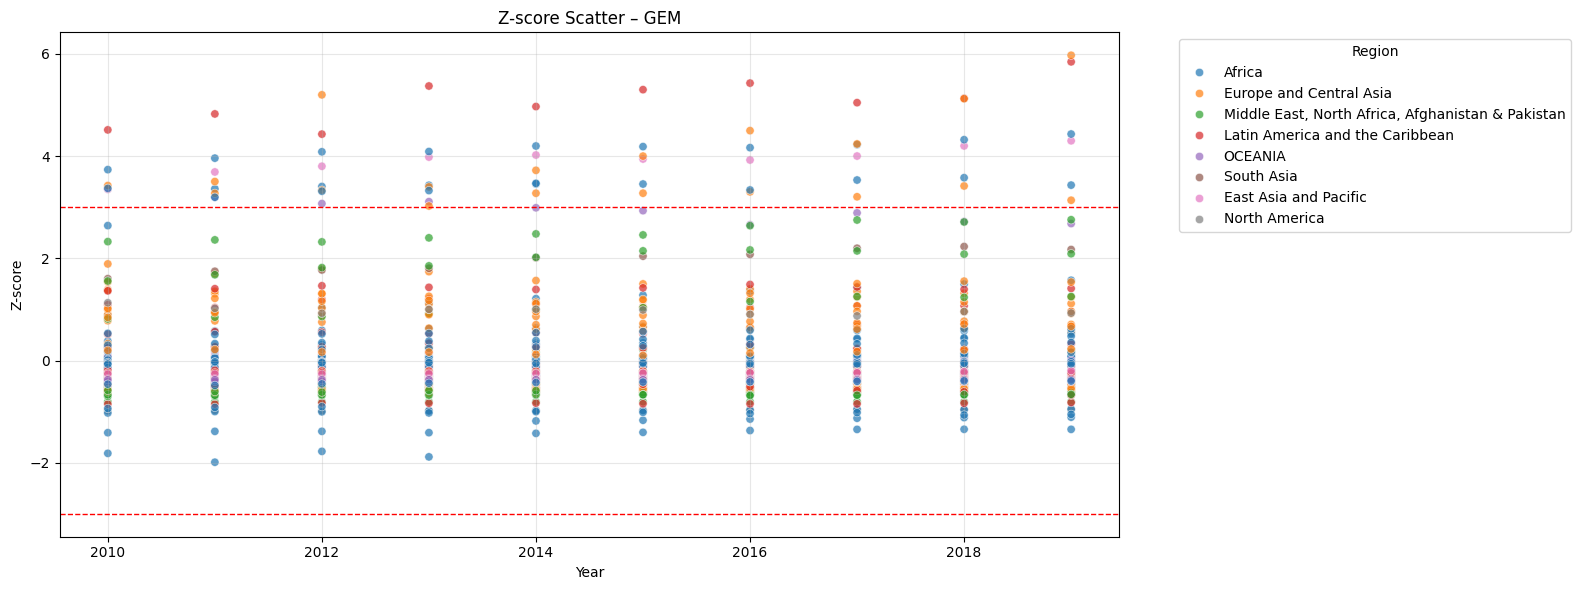

In [577]:
indicator = "GEM"

subset = df_outliers[df_outliers["indicator_id"] == indicator]

plt.figure(figsize=(16, 6))

sns.scatterplot(
    data=subset,
    x="year",
    y="z_score",
    hue="region",
    alpha=0.7
)

# Outlier thresholds
plt.axhline(3, color="red", linestyle="--", linewidth=1)
plt.axhline(-3, color="red", linestyle="--", linewidth=1)

plt.title(f"Z-score Scatter – {indicator}")
plt.ylabel("Z-score")
plt.xlabel("Year")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


# Select a specific region and get the outliers for each indicator for intervals of 10 years

We will select the region with the most outliers "Europe and Central Asia" and we will compute the outliers for each indicator for each indecator for intervals of 10 years  

Since our data are from 2008 to 2019 included, we are only going to take the outliers for every 2 years


In [578]:
df_all['year'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019])

In [ ]:
#Separate the values for the selected region in a dictinalry
df_all_eu = df_all[df_all['region'] == 'Europe and Central Asia']
indicator_list = list(df_all_eu['indicator_id'].unique())
year_list = list(df_all_eu['year'].unique())

In [580]:
df_all_eu.head()

,country_id,indicator_id,year,value,country_name,region,indicator_name,unit
72,ALB,CHE,2008,5.509003,Albania,Europe and Central Asia,Current health expenditure,% of GDP
73,ALB,CHE,2009,5.826039,Albania,Europe and Central Asia,Current health expenditure,% of GDP
74,ALB,CHE,2010,6.236677,Albania,Europe and Central Asia,Current health expenditure,% of GDP
75,ALB,CHE,2011,6.182977,Albania,Europe and Central Asia,Current health expenditure,% of GDP
76,ALB,CHE,2012,6.157462,Albania,Europe and Central Asia,Current health expenditure,% of GDP


In [ ]:
"""In order to find outliers for df_all_eu, we will need to find the outliers within the specific region 
and within the specific interval. So now we have different mean and std deviation with respect to the
data distribution. We do not take all years."""

#Create a new column which has the lowest year of the interval
#
interval =4
df_all_eu['interval'] = (df_all_eu['year'] // interval)*interval

In [ ]:
df_all_eu['interval'].unique() #this has the 1st year of each interval

array([2008, 2012, 2016])

In [ ]:
''' go through the dictionary of selected region and group by interval
Then find the outliers for this specific group of values per region and interval
and then save these in a dictionary of results'''
#
results ={}
#find outlier grouping by interval
interval_list = list(set([(year//interval)* interval for year in year_list]))
#
for int in interval_list:
    dX = df_all_eu[df_all_eu['interval'] == int]
    results[int] = find_outliers(dX)

[np.int64(2008), np.int64(2016), np.int64(2012)]
